## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [1]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
columns_to_select = ['City Name','Package','Variety','Origin','Item Size', 'Color']
pumpkins = full_pumpkins.loc[:,columns_to_select]

In [3]:
pumpkins.dropna(inplace=True)
pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE


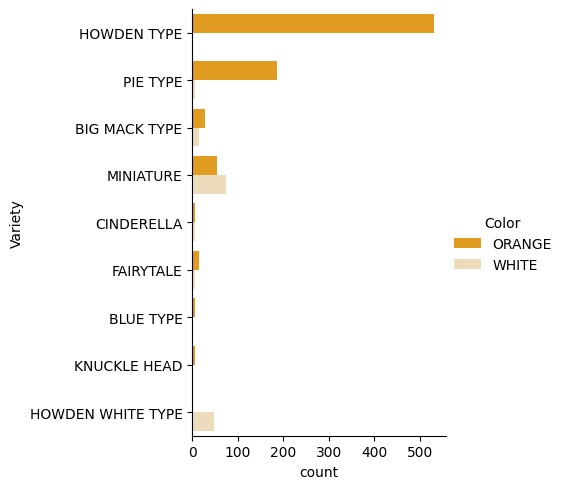

In [4]:
import seaborn as sea
palette = {'ORANGE':'orange','WHITE':'wheat'}
sea.catplot(data=pumpkins,y='Variety',hue='Color',kind='count',palette=palette)

In [5]:
pumpkins['Item Size'].unique()

array(['med', 'lge', 'sml', 'xlge', 'med-lge', 'jbo', 'exjbo'],
      dtype=object)

In [6]:
from sklearn.preprocessing import OrdinalEncoder
Item_Size_Categories = [['med', 'lge', 'sml', 'xlge', 'med-lge', 'jbo', 'exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=Item_Size_Categories)

In [7]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['City Name', 'Package' ,'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [8]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('ord',ordinal_encoder,ordinal_features),('cat',categorical_encoder,categorical_features)])
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)
encoded_features.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_MICHIGAN,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])
encoded_pumpkins = encoded_features.assign(Color=encoded_label)
encoded_pumpkins.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,Color
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
list(label_encoder.inverse_transform([0,1]))

['ORANGE', 'WHITE']

/tmp/ipykernel_496/605153592.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sea.catplot(data=pumpkins, x='Item Size', y='Color', row='Variety', kind='box', orient='h', sharex=False, margin_titles=True, height=1.5, aspect=4, palette=palette)
/workspaces/ML-For-Beginners/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


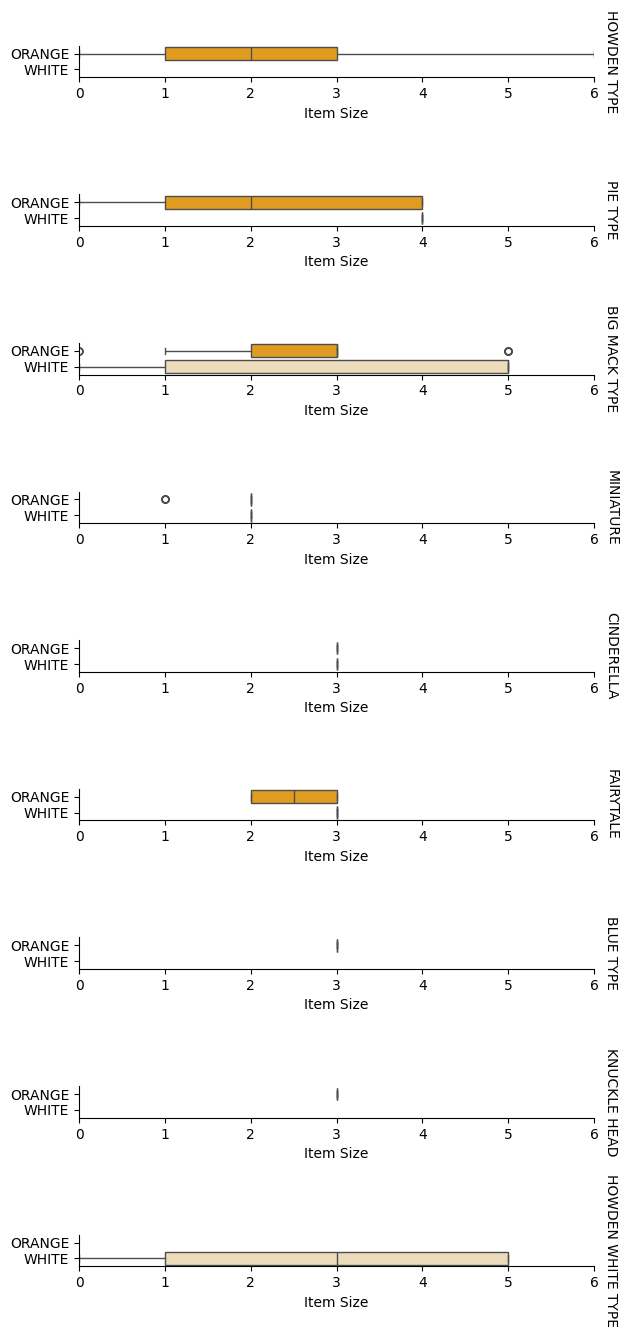

In [11]:
palette = {'ORANGE':'orange','WHITE':'wheat'}
pumpkins['Item Size'] = encoded_pumpkins['ord__Item Size']
# g=sea.catplot(data=pumpkins,x='Item Size',y='Color',row='Variety', kind='box' , orient='h',sharex=False , margin_titles=True , height=1.5 , aspect=4 , palette=palette)
# g.set(xlabel="Item Size",ylabel="").set(xlim=(0,6))
# g.set_titles(row_templates="{row name}")

# Create the catplot
g = sea.catplot(data=pumpkins, x='Item Size', y='Color', row='Variety', kind='box', orient='h', sharex=False, margin_titles=True, height=1.5, aspect=4, palette=palette)
# Set axis labels and limits
g.set(xlabel="Item Size", ylabel="").set(xlim=(0, 6))
# Fix the typo in `row_template`
g.set_titles(row_template="{row_name}")

/tmp/ipykernel_496/2292694764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.swarmplot(x='Color',y="ord__Item Size", data=encoded_pumpkins, palette=palette)
/workspaces/ML-For-Beginners/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/workspaces/ML-For-Beginners/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='ord__Item Size'>

/workspaces/ML-For-Beginners/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/workspaces/ML-For-Beginners/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


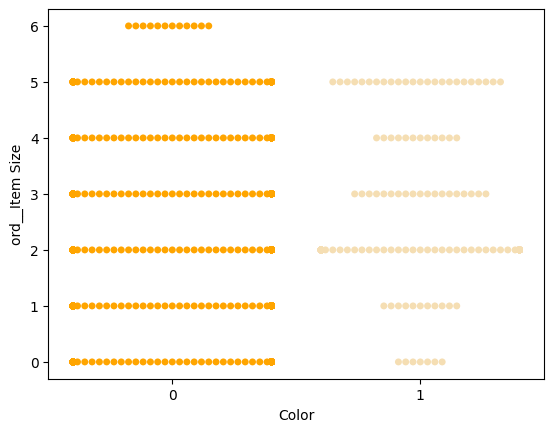

In [12]:
palette = {'0': 'orange', '1':'wheat'}
sea.swarmplot(x='Color',y="ord__Item Size", data=encoded_pumpkins, palette=palette)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# X is the encoded features
X = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])]

# y is the encoded label
y = encoded_pumpkins['Color']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print('Predicted Labels',predictions)
print('F1 Score',f1_score(y_test,predictions))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Predicted Labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
F1 Score 0.7457627118644068


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[162,   4],
       [ 11,  22]])

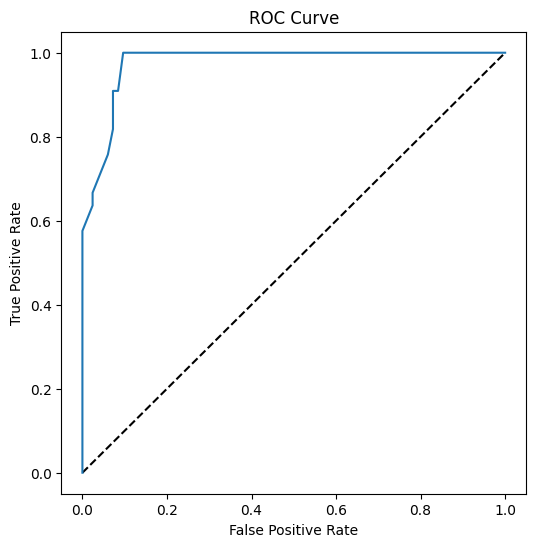

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate predicted probabilities for the test set
y_scores = model.predict_proba(X_test)

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

# Plot the ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal (random guessing) line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [16]:
from sklearn.metrics import roc_auc_score

# Calculate the AUC for the ROC curve
auc = roc_auc_score(y_test, y_scores[:, 1])

# Print the AUC value
print(f"AUC: {auc:.3f}")

AUC: 0.976
